<a href="https://colab.research.google.com/github/habiib1999/Image-Segmentation/blob/master/PR_Ass_2_Image_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# clone the git hub 
# to add the dataset in the 
#VR files
!git clone https://github.com/osamasherif22/Image-Segmentation



fatal: destination path 'Image-Segmentation' already exists and is not an empty directory.


In [72]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from google.colab.patches import cv2_imshow


# KMEANS

In [80]:
import math; #For pow and sqrt
import sys;
from random import shuffle, uniform;
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import itertools
import random


def FindNearshCentroid(means,item):
    
    minimum = sys.maxsize
    index = -1;

    for i in range(len(means)):
        #Ecludean distance
        dis = np.linalg.norm(item-means[i])

        if(dis < minimum):
            minimum = dis;
            index = i;
    
    return index;


def UpdateCentroids(clusters_data, items, centroids):

    for i in range( len(clusters_data) ):
        new_centroid_sum_x = 0
        new_centroid_sum_y = 0
        for j in range( len(clusters_data[i]) ):
            index = clusters_data[i][j]
            new_centroid_sum_x += items[index][0]
            new_centroid_sum_y += items[index][1]
        centroids[i][0] = new_centroid_sum_x/float(j+1)
        centroids[i][1] = new_centroid_sum_y/float(j+1)
    return centroids



def groupToCentroid(centroids,items):
    clusters_size = [0 for i in range(len(centroids))]
    clusters_data = [[] for i in range(len(centroids))]; #Init clusters
    for i in range(len(items)):
        item = items[i];           
        centroid_index = FindNearshCentroid(centroids,item);
        clusters_size[centroid_index] += 1;
        clusters_data[centroid_index].append(i)
    return clusters_data, clusters_size

def initializeCentroids(k,items):
    centroids = [[0 for i in range(len(items[0]))] for j in range(k)] #Init centroids array
    centroids = np.array(centroids)
    #print(len(centroids))
    randomIndexes = random.sample(range(0, 24), k)
    #print(randomIndexes)
    for i in range(len(randomIndexes)):
      #print(centroids.shape)
      #print(items.shape)
      centroids[i] = items[randomIndexes[i]]
    return centroids

def KMeans(k,items):

    iterations = 0
    converge_counter = 0
    # initialize centroids
    centroids = [[] for i in range(k)]
    centroids = np.array(centroids)
    centroids = initializeCentroids(k,items)

    old_centroids = [[] for i in range(len(centroids))]; 
    old_centroids = np.array(old_centroids)
    while np.array_equal(old_centroids, centroids) != True :
      
      converge_counter = converge_counter + 1
      clusters_data , clusters_size = groupToCentroid(centroids, items)
      old_centroids = np.copy(centroids)
      centroids = UpdateCentroids(clusters_data, items, centroids) 
      #print("old centroids  = ", old_centroids)
      #print("new centroids  = ", centroids)


      colors = itertools.cycle(["r", "b", "g", "c" , "m" , "y"])
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(clusters_data)):

        item_index_array = clusters_data[i]
        point_color = next(colors)
        for j in item_index_array:
          
          plt.scatter(items[j][0], items[j][1], color = point_color)
          
      plt.show()

      print("CLUSTERS ---------------------------------",clusters_data)
      return clusters_data

In [73]:
# root = '/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/'
# PATH = os.path.join(root,'data//groundTruth')


# os.makedirs(save_pth,exist_ok=True)

# for sub_dir_name in ['train','test','val']:
#     sub_pth = os.path.join(PATH,sub_dir_name)
#     ##Create a new folder for the generated pictures to save
#     save_pth = os.path.join(root,'data//GT_sorted',sub_dir_name)
#     os.makedirs(save_pth,exist_ok=True)
#     sub_pth =  sorted(sub_pth)
#     print(sorted_files)
#   # imageio.imwrite(os.path.join(save_pth,new_img_name), edge_data_255)  # save Picture

# PATH = os.path.join(root,'data//images')

# for sub_dir_name in ['train','test','val']:
#     sub_pth = os.path.join(PATH,sub_dir_name)
#     ##Create a new folder for the generated pictures to save
#     save_pth = os.path.join(base,'data//GT_sorted',sub_dir_name)
#     os.makedirs(save_pth,exist_ok=True)
#     sub_pth =  sorted(sub_pth)
#     print(sorted_files)

# Load the data set and Display an image

In [74]:


# Read all the jpg image directory
def load_image(image_path):
    arr_imgs=[]
    shapes =[]
    file_name=glob(image_path+"/*jpg")
    for file in file_name:
        pic = cv2.imread(file).astype(np.float32)
        shape = pic.shape
        shapes.append(shape)
        arr_imgs.append(pic.reshape(-1, pic.shape[-1]))
        print(file)
    arr_imgs = np.array(arr_imgs) # Convert to np array

    display_img(arr_imgs[0],shapes[0])
    print(arr_imgs[0])
    print(shape[0])
    return arr_imgs

def display_img (image,shape):
  # Output img with window name as 'image'
  cv2_imshow(image.reshape(shape[0],shape[1],3))  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)      



/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/20069.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/217090.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/206062.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/69022.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/100039.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/101027.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/17067.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/189096.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/147077.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/220003.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/test/288024.jpg
/content/Image-Segmentation/Dataset

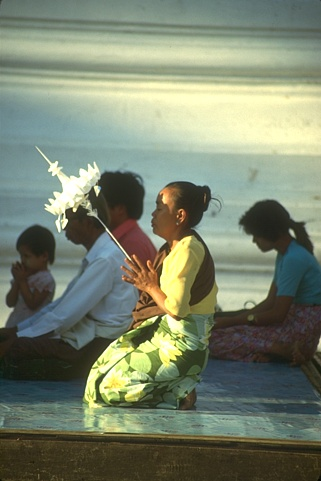

[[49. 57. 47.]
 [68. 76. 66.]
 [92. 98. 87.]
 ...
 [ 3. 11. 10.]
 [ 3.  8.  6.]
 [ 8. 11.  9.]]
321
(200, 154401, 3)
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/365073.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/388016.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/271031.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/113009.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/188091.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/106020.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/216066.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/187039.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/207056.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/train/1570

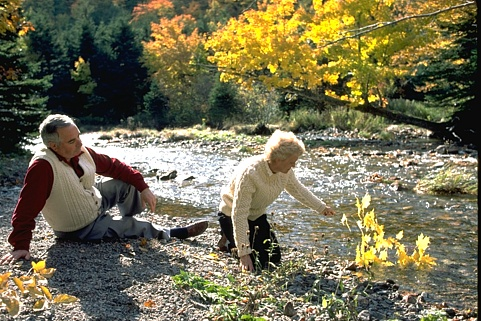

[[ 30.  88. 107.]
 [ 49. 103. 120.]
 [ 40.  88. 106.]
 ...
 [  4.  13.  17.]
 [  6.  10.  15.]
 [  7.   9.  10.]]
321
(200, 154401, 3)
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/163085.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/196073.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/108082.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/223061.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/210088.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/189080.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/208001.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/69040.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/86016.jpg
/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/val/45096.jp

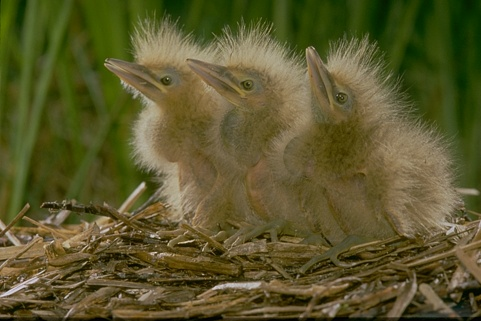

[[ 0. 46. 23.]
 [ 9. 79. 56.]
 [ 2. 78. 54.]
 ...
 [ 5.  5.  5.]
 [ 5.  5.  5.]
 [ 5.  5.  5.]]
321


(100, 154401, 3)

In [75]:
base='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/'


#load test data set
test_imgs=load_image(base+'test/')
print(test_imgs.shape)

#load train data set
train_imgs=load_image(base+'train/')
print(train_imgs.shape)

#load val data set
val_imgs=load_image(base+'val/')
val_imgs.shape
 

In [76]:
from scipy import io
import scipy
import os
import imageio
root = '/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/'

def load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr):
  PATH = os.path.join(root,'data//groundTruth')
  for sub_dir_name in ['train','test','val']:
      temp_arr=[]
      sub_pth = os.path.join(PATH,sub_dir_name)
      ##Create a new folder for the generated pictures to save
      save_pth = os.path.join(root,'data//GT_convert',sub_dir_name)
      os.makedirs(save_pth,exist_ok=True)
      print('Start conversion'+sub_dir_name+'Content in folder')

      for filename in os.listdir(sub_pth):
          # Read all data in the mat file
          #mat file contains data stored in dictionary form
          #Include dict_keys(['__globals__','groundTruth','__header__','__version__'])
          #If you want to use the contour in'groundTruth']
          #x['groundTruth'][0][0][0][0][1] is the outline
          #x['groundTruth'][0][0][0][0][0] is the segmentation map
          data = io.loadmat(os.path.join(sub_pth,filename))
          edge_data = data['groundTruth'][0][0][0][0][1]
          #Store the normalized data: 0<x<1
          #So need to restore back to 0<x<255
          edge_data_255 = edge_data * 255
          temp_arr.append(edge_data_255)
          new_img_name = filename.split('.')[0]+'.jpg'
          print(new_img_name)
          #imageio.imwrite(os.path.join(save_pth,new_img_name), edge_data_255)  # save Picture
      if (sub_dir_name=='train' ):
        groundtrain_arr= temp_arr.copy()
        print("#################\nstored in train \n############",np.array(groundtrain_arr).shape)
      elif (sub_dir_name=='test' ):
        groundtest_arr= temp_arr.copy()
        print("#################\nstored in test \n############",np.array(groundtest_arr).shape)
      else:
        groundval_arr= temp_arr.copy()
        print("#################\nstored in val  \n############",np.array(groundval_arr).shape)

  return (groundtest_arr,groundtrain_arr,groundval_arr)
groundtest_arr=[]
groundtrain_arr=[]
groundval_arr=[]
groundtest_arr,groundtrain_arr,groundval_arr=load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr)


Start conversiontrainContent in folder
55075.jpg
153093.jpg
309004.jpg
246016.jpg
188063.jpg
198004.jpg
100098.jpg
286092.jpg
135037.jpg
187029.jpg
365073.jpg
138078.jpg
153077.jpg
65019.jpg
247085.jpg
118035.jpg
87065.jpg
109034.jpg
22013.jpg
161062.jpg
176019.jpg
166081.jpg
268002.jpg
108073.jpg
43070.jpg
163062.jpg
112082.jpg
372047.jpg
76002.jpg
95006.jpg
271031.jpg
117054.jpg
35058.jpg
147062.jpg
65010.jpg
159045.jpg
147021.jpg
376020.jpg
48055.jpg
159029.jpg
242078.jpg
310007.jpg
311068.jpg
293029.jpg
66039.jpg
94079.jpg
42078.jpg
277095.jpg
140055.jpg
108041.jpg
216041.jpg
97017.jpg
25098.jpg
105053.jpg
292066.jpg
24063.jpg
61086.jpg
163014.jpg
172032.jpg
35091.jpg
2092.jpg
140075.jpg
155060.jpg
20008.jpg
202012.jpg
249087.jpg
301007.jpg
103041.jpg
285036.jpg
54005.jpg
126039.jpg
61060.jpg
188091.jpg
365025.jpg
311081.jpg
198023.jpg
55067.jpg
183087.jpg
183055.jpg
216066.jpg
15004.jpg
23084.jpg
385028.jpg
124084.jpg
28075.jpg
209070.jpg
368016.jpg
159091.jpg
15088.jpg
113044.jpg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


253016.jpg
41096.jpg
61034.jpg
188025.jpg
196062.jpg
41085.jpg
5096.jpg
185092.jpg
80090.jpg
189096.jpg
118031.jpg
196088.jpg
35049.jpg
140088.jpg
29030.jpg
335094.jpg
207038.jpg
189013.jpg
70090.jpg
141048.jpg
159002.jpg
306051.jpg
238025.jpg
187058.jpg
103006.jpg
157087.jpg
43051.jpg
220003.jpg
206062.jpg
187099.jpg
145059.jpg
92014.jpg
16004.jpg
134067.jpg
35028.jpg
385022.jpg
3063.jpg
277053.jpg
175083.jpg
64061.jpg
181021.jpg
69000.jpg
71076.jpg
33044.jpg
123057.jpg
107072.jpg
243095.jpg
134049.jpg
130066.jpg
376086.jpg
100099.jpg
368037.jpg
15062.jpg
23050.jpg
217090.jpg
80085.jpg
79073.jpg
2018.jpg
326025.jpg
15011.jpg
290035.jpg
202000.jpg
281017.jpg
163096.jpg
48025.jpg
196027.jpg
147077.jpg
130014.jpg
108069.jpg
107014.jpg
201080.jpg
41029.jpg
257098.jpg
14092.jpg
101027.jpg
106047.jpg
141012.jpg
230098.jpg
97010.jpg
36046.jpg
145079.jpg
393035.jpg
259060.jpg
81090.jpg
189029.jpg
41006.jpg
285022.jpg
107045.jpg
279005.jpg
78098.jpg
160067.jpg
346016.jpg
157032.jpg
388018.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


123074.jpg
12084.jpg
126007.jpg
86000.jpg
189080.jpg
304074.jpg
86016.jpg
87046.jpg
24077.jpg
295087.jpg
351093.jpg
106024.jpg
143090.jpg
219090.jpg
157055.jpg
38092.jpg
78004.jpg
14037.jpg
208001.jpg
197017.jpg
66053.jpg
304034.jpg
210088.jpg
253027.jpg
130026.jpg
175043.jpg
271035.jpg
175032.jpg
223061.jpg
296059.jpg
167062.jpg
16077.jpg
163085.jpg
291000.jpg
196073.jpg
241004.jpg
19021.jpg
147091.jpg
43074.jpg
148089.jpg
302008.jpg
55073.jpg
148026.jpg
376043.jpg
260058.jpg
101087.jpg
42012.jpg
159008.jpg
119082.jpg
101085.jpg
220075.jpg
33039.jpg
108082.jpg
361010.jpg
156065.jpg
385039.jpg
299086.jpg
103070.jpg
41069.jpg
160068.jpg
285079.jpg
42049.jpg
69040.jpg
62096.jpg
86068.jpg
134035.jpg
253055.jpg
170057.jpg
58060.jpg
182053.jpg
216081.jpg
236037.jpg
38082.jpg
108070.jpg
145086.jpg
296007.jpg
227092.jpg
76053.jpg
21077.jpg
54082.jpg
229036.jpg
3096.jpg
241048.jpg
306005.jpg
300091.jpg
37073.jpg
69015.jpg
45096.jpg
41033.jpg
109053.jpg
102061.jpg
167083.jpg
89072.jpg
85048.jpg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


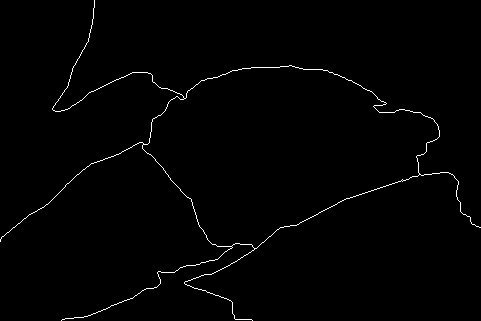

In [77]:
def displayy_img (image):
  # Output img with window name as 'image'
  cv2_imshow(image[0])  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)  


print(np.array(groundval_arr[0]))
displayy_img(np.array(groundval_arr))
#displayy_img(val_imgs)